<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong>
<strong><center>Created by Jose Marcial Portilla.</center></strong>
# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    


## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
single_image = x_train[0]

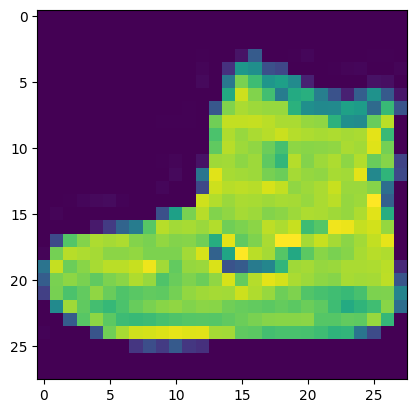

In [ ]:
plt.imshow(single_image)

In [ ]:
single_image.shape

(28, 28)

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [ ]:
x_train = x_train/255

In [ ]:
x_test = x_test/255

In [ ]:
scaled_image = x_train[0]
scaled_image.max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [ ]:
x_train.shape


(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [ ]:
x_test = x_test.reshape(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat_train = to_categorical(y_train, 10)

In [ ]:
y_cat_test = to_categorical(y_test, 10)

In [ ]:
y_example = y_cat_train[0]

In [ ]:
y_example

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

#convolution layer
model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (28,28,1), activation = 'relu'))

#pooling layer
model.add(MaxPool2D(pool_size = (2,2)))

#flatten results
model.add(Flatten())

#Dense layer
model.add(Dense(128, activation = 'relu'))

#final dense layer
model.add(Dense(10, activation = 'softmax'))

#compile and put together the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [ ]:
model.fit(x_train, y_cat_train, epochs = 15, validation_data = (x_test, y_cat_test), callbacks = [early_stop])

Epoch 1/15
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2809 - accuracy: 0.8990 - val_loss: 0.3219 - val_accuracy: 0.8821
Epoch 2/15
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2411 - accuracy: 0.9123 - val_loss: 0.3091 - val_accuracy: 0.8901
Epoch 3/15
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2128 - accuracy: 0.9228 - val_loss: 0.2939 - val_accuracy: 0.8995
Epoch 4/15
1875/1875 [==============================] - 52s 27ms/step - loss: 0.1907 - accuracy: 0.9298 - val_loss: 0.2702 - val_accuracy: 0.9015
Epoch 5/15
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1734 - accuracy: 0.9370 - val_loss: 0.2784 - val_accuracy: 0.9053
Epoch 6/15
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1580 - accuracy: 0.9419 - val_loss: 0.2938 - val_accuracy: 0.9082


### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.280904,0.899017,0.321946,0.8821
1,0.241132,0.912350,0.309080,0.8901
2,0.212797,0.922833,0.293949,0.8995
3,0.190676,0.929800,0.270169,0.9015
4,0.173441,0.936983,0.278394,0.9053


<Axes: >

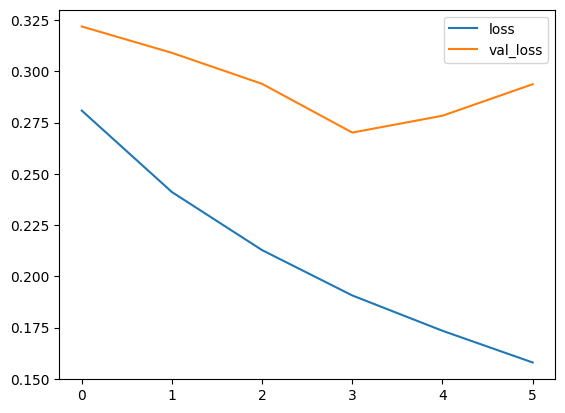

In [ ]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

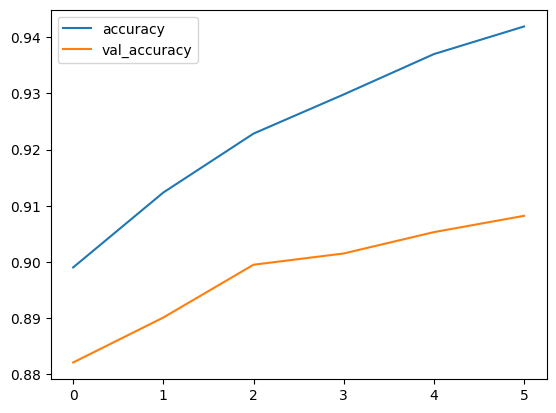

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
print(model.metrics_names)
print(model.evaluate(x_test, y_cat_test, verbose = 0))

['loss', 'accuracy']
[0.2937646508216858, 0.9082000255584717]


In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 5s 15ms/step


In [ ]:
classes_x=np.argmax(predictions,axis=1)

In [ ]:
classes_x

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
predictions[0]

array([2.4068950e-08, 3.3624919e-12, 2.9912943e-09, 5.5776330e-09,
       1.4051284e-10, 4.1946929e-05, 1.1070271e-09, 3.0293548e-03,
       5.0655296e-07, 9.9692816e-01], dtype=float32)

In [ ]:
classes_x[0]

9

In [ ]:
my_pred_img = x_test[0]

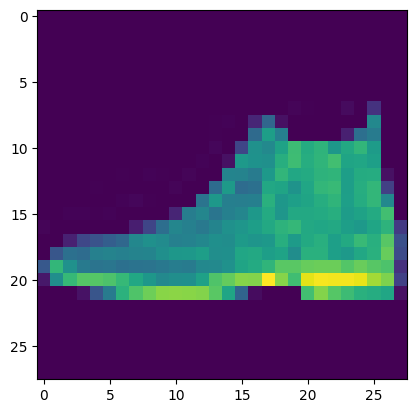

In [ ]:
plt.imshow(my_pred_img.reshape(28,28))

In [ ]:
model.predict(my_pred_img.reshape(1,28,28,1))

1/1 [==============================] - 0s 35ms/step


array([[2.4068950e-08, 3.3624984e-12, 2.9912943e-09, 5.5776224e-09,
        1.4051284e-10, 4.1946969e-05, 1.1070292e-09, 3.0293565e-03,
        5.0655439e-07, 9.9692816e-01]], dtype=float32)

Prediction is class 9 - ankle boot, which matches the image.
predict_classes was deprecated, so I used model.predict instead.
Isn't the best but that's okay, as long as it works with the code below.

In [ ]:
print(confusion_matrix(y_test, classes_x))

[[861   3   8  20   5   1  97   0   5   0]
 [  1 981   0  12   4   0   0   0   2   0]
 [ 22   0 855   9  65   0  49   0   0   0]
 [ 10   5   9 940  15   0  21   0   0   0]
 [  0   1  68  28 866   0  37   0   0   0]
 [  0   0   0   1   0 978   0  15   0   6]
 [108   1  65  31  75   0 716   0   4   0]
 [  0   0   0   0   0   7   0 983   0  10]
 [  7   1   2   3   3   1   3   2 978   0]
 [  0   0   0   0   0   8   0  67   1 924]]


In [ ]:
print(classification_report(y_test, classes_x))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.85      0.85      1000
           3       0.90      0.94      0.92      1000
           4       0.84      0.87      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.78      0.72      0.74      1000
           7       0.92      0.98      0.95      1000
           8       0.99      0.98      0.98      1000
           9       0.98      0.92      0.95      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
import seaborn as sns

<Axes: >

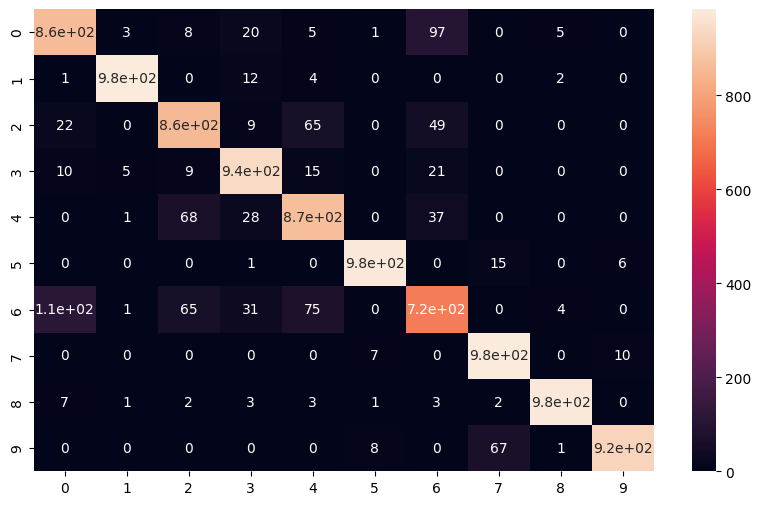

In [ ]:

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, classes_x), annot=True)

In [ ]:
(model.predict(x_test) > 0.5)

313/313 [==============================] - 2s 8ms/step


array([[False, False, False, ..., False, False,  True],
       [False, False,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

# Great Job!